<a href="https://colab.research.google.com/github/sampath11/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module1-vectors-and-matrices/Sam_Kumar_DSPT3_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics



## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




In [0]:

a = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

df = pd.DataFrame (a, columns=['sales']) 

df.head()




,sales
0,3505
1,2400
2,3027
3,2798
4,3700


In [0]:
np.sqrt(36)

6.0

In [0]:
n = len(a)

df['mean'] = sum(a)/n

df['dist_from_mean'] = df['sales'] - df['mean']

df['dist_from_mean_sq'] = df['dist_from_mean']**2

df['variance'] = df['dist_from_mean_sq'].sum() / n


df['std_deviation'] = np.sqrt(df['variance'])

df.head()

,sales,mean,dist_from_mean,dist_from_mean_sq,variance,std_deviation
0,3505,3052.714286,452.285714,204562.367347,183761.061224,428.673607
1,2400,3052.714286,-652.714286,426035.938776,183761.061224,428.673607
2,3027,3052.714286,-25.714286,661.224490,183761.061224,428.673607
3,2798,3052.714286,-254.714286,64879.367347,183761.061224,428.673607
4,3700,3052.714286,647.285714,418978.795918,183761.061224,428.673607


In [0]:
### Now lets use built in function and validate

print ( "Mean :", df['sales'].mean() )    
       
print ("variance :", df['sales'].var(ddof=0))

print ( "std deviation: ", df['sales'].std(ddof=0))



Mean : 3052.714285714286
variance : 183761.06122448976
std deviation:  428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

cust_instore = [127, 80, 105, 92, 120, 115, 93]

data = { 'sales': sales, 'cust_instore': cust_instore }
  
df = pd.DataFrame (data)

df.head()

,sales,cust_instore
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120


In [0]:
df.cov()

,sales,cust_instore
sales,214387.904762,7604.357143
cust_instore,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
df.head()


n = len(sales)

df['sales_mean'] = sum(sales)/n

df['sales_dist_from_mean'] = df['sales'] - df['sales_mean']

df['sales_dist_from_mean_sq'] = df['sales_dist_from_mean']**2

df['sales_variance'] = df['sales_dist_from_mean_sq'].sum() / n

df['sales_std_deviation'] = np.sqrt(df['sales_variance'])





df['cust_mean'] = sum(cust_instore)/n

df['cust_dist_from_mean'] = df['cust_instore'] - df['cust_mean']

df['cust_dist_from_mean_sq'] = df['cust_dist_from_mean']**2

df['cust_variance'] = df['cust_dist_from_mean_sq'].sum() / n

df['cust_std_deviation'] = np.sqrt(df['cust_variance'])


df.head() 


,sales,cust_instore,sales_mean,sales_dist_from_mean,sales_dist_from_mean_sq,sales_variance,sales_std_deviation,cust_mean,cust_dist_from_mean,cust_dist_from_mean_sq,cust_variance,cust_std_deviation
0,3505,127,3052.714286,452.285714,204562.367347,183761.061224,428.673607,104.571429,22.428571,503.040816,249.387755,15.792016
1,2400,80,3052.714286,-652.714286,426035.938776,183761.061224,428.673607,104.571429,-24.571429,603.755102,249.387755,15.792016
2,3027,105,3052.714286,-25.714286,661.224490,183761.061224,428.673607,104.571429,0.428571,0.183673,249.387755,15.792016
3,2798,92,3052.714286,-254.714286,64879.367347,183761.061224,428.673607,104.571429,-12.571429,158.040816,249.387755,15.792016
4,3700,120,3052.714286,647.285714,418978.795918,183761.061224,428.673607,104.571429,15.428571,238.040816,249.387755,15.792016


In [0]:

# calculate covariance

df_new = df[['sales', 'cust_instore']]
      
df_new.head()


,sales,cust_instore
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120


In [0]:
cov = df_new.cov().to_numpy()

print (type (cov))

print (cov)



<class 'numpy.ndarray'>
[[214387.9047619    7604.35714286]
 [  7604.35714286    290.95238095]]


In [0]:
print (cov[1][0])

7604.357142857142


In [0]:
## get std deviation values

sales_dev = df['sales_std_deviation'].unique()

print ("Sales std deviation :", sales_dev)


cust_dev = df['cust_std_deviation'].unique()

print ("customer std deviation :", cust_dev)

Sales std deviation : [428.67360687]
customer std deviation : [15.79201555]


In [0]:
## compute correlation coefficient

corr = cov[1][0] /( cust_dev * sales_dev	)

print (corr)


## now check with function call


np.corrcoef(df_new['sales'], df_new['cust_instore'])



[1.12330631]


array([[1.        , 0.96283398],
       [0.96283398, 1.        ]])

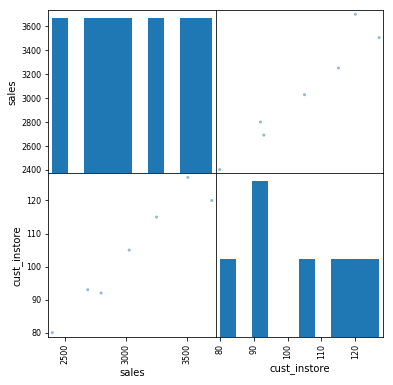

In [0]:
##  see visually

pd.plotting.scatter_matrix (df_new, figsize=(6,6))
plt.show()

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
##

cols = ['Person', 'pclass', 'survived', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body',
       'home.dest', 'has_cabin_number']


df = pd.read_csv ("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv", names=cols, header=0)

df.columns


df.head()

,Person,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [0]:
# find out the numeric dtypes

df.dtypes

Person                int64
pclass              float64
survived            float64
name                 object
sex                  object
age                 float64
sibsp               float64
parch               float64
ticket               object
fare                float64
cabin                object
embarked             object
boat                 object
body                float64
home.dest            object
has_cabin_number      int64
dtype: object

In [0]:
## create new df with only numeric columns

df_titanic = df[['Person', 'pclass', 'survived', 'age','sibsp', 'parch', 'fare', 'has_cabin_number']]

df_titanic.head()

,Person,pclass,survived,age,sibsp,parch,fare,has_cabin_number
0,1,1.0,1.0,29.0000,0.0,0.0,211.3375,1
1,2,1.0,1.0,0.9167,1.0,2.0,151.5500,1
2,3,1.0,0.0,2.0000,1.0,2.0,151.5500,1
3,4,1.0,0.0,30.0000,1.0,2.0,151.5500,1
4,5,1.0,0.0,25.0000,1.0,2.0,151.5500,1


In [0]:
# run variance-covariance
df_titanic.var()

Person              143117.500000
pclass                   0.701969
survived                 0.236250
age                    165.850021
sibsp                    1.085052
parch                    0.749195
fare                  2678.959738
has_cabin_number         0.174613
dtype: float64

In [0]:
df_titanic.std()

Person              378.308736
pclass                0.837836
survived              0.486055
age                  12.878277
sibsp                 1.041658
parch                 0.865560
fare                 51.758668
has_cabin_number      0.417867
dtype: float64

In [0]:
df_titanic.cov()

,Person,pclass,survived,age,sibsp,parch,fare,has_cabin_number
Person,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,10.976961
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,0.174613


In [0]:
df_titanic.corr()

,Person,pclass,survived,age,sibsp,parch,fare,has_cabin_number
Person,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,0.507253
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,1.000000


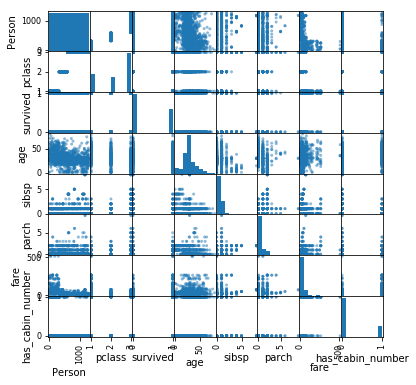

In [0]:
pd.plotting.scatter_matrix(df_titanic, figsize=(6,6))
plt.show()

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

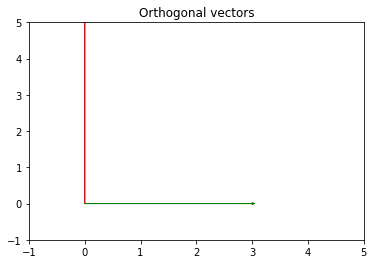

In [0]:
# Lets havce two vectors

vect_1 = [0, 5]
vect_2 = [3, 0]

# plot them

plt.arrow (0, 0, vect_1[0], vect_1[1], head_width=0.05, head_length=0.05, color='red')
plt.xlim (-1, 5)

plt.arrow (0, 0, vect_2[0], vect_2[1], head_width=0.05, head_length=0.05, color='green')
plt.ylim ( -1, 5)

plt.title ("Orthogonal vectors")

plt.show()

In [0]:
np.dot (vect_1, vect_2)

0

## We know two vectors are orthogonal if their product is 0, and in the plot we see they are perpendicular. It is denoted by symbol  ⊥.

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
a = [-5, 3, 7]

b = [6, -8, 2]

print ( a, b)

[-5, 3, 7] [6, -8, 2]


In [0]:
## multiple and see the output of vectors

np.dot (a, b)

-40

### The product of these two vectors is -40, not 0. So they are not orthogonal vectors

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c = np.array([ 2, -15, 6, 20])

print ( c )

[  2 -15   6  20]


In [0]:
c_norm_sqrd = c[0]**2 + c[1]**2 + c[2]**2 + c[3]**2

c_norm_sqrd

665

### ||𝑐||2  is 665

In [0]:
print (c)

c_transpose =  c.T 

print ("C_transpose is ", c_transpose)

print (" ctanspose * c is:", c_transpose *c)

print (" c * c is :", c*c)



[  2 -15   6  20]
C_transpose is  [  2 -15   6  20]
 ctanspose * c is: [  4 225  36 400]
 c * c is : [  4 225  36 400]


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

#### Your text

d = 7 * [1, 0] + 3 * [ 0, 1]

e = 2 *[1, 0, 0] + 11 * [0, 1, 0] + -8 * [ 0, 0, 1]

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
## compute norm f

f = [4, 12, 11, 9, 2]

f_norm = np.sqrt (f[0]**2 + f[1]**2 + f[2]**2 + f[3]**2 + f[4]**2)

f_norm = np.reciprocal (f_norm)

f_norm

0.05227083734893167

In [0]:
f_unit_vec = np.multiply (f_norm, f)

f_unit_vec

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



## 6.2 What does it mean to form a basis?

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

## 7.2 What does the rank of a matrix tell us?

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

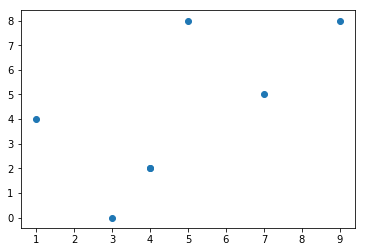

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()